In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from test import *

In [2]:
a = Tensor([1,1,1,1], label='a')
b = Tensor([2], label='b')
c = (a * b).sum()
c = (a * b)
c.label = 'c'
print(c)
d = c.sum()
d.label = 'd'
d.grad = 1.0
d._backward()
c._backward()
# a._backward()
# b._backward()
print(f'a: {a.data} b: {b.data} c: {c.data}\na.grad: {a.grad} b.grad: {b.grad} c.grad: {c.grad}')

Tensor([2 2 2 2])
a: [1 1 1 1] b: [2] c: [2 2 2 2]
a.grad: [2. 2. 2. 2.] b.grad: [4.] c.grad: [1. 1. 1. 1.]


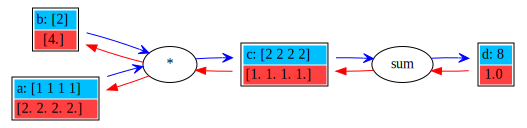

In [3]:
visualizer = ForwardGraphVisualizer()

visualizer.visualize(d)

In [5]:

class Neuron:
  
  def __init__(self, nin):
    self.w = [Tensor(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Tensor(random.uniform(-1,1))
  
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
  def __repr__(self):
    return f"Neuron({len(self.w)} w:{self.w})\n"
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]
  
  def __repr__(self):
    return f"Layer\n({self.neurons})\n"

class MLP:
  
  def __init__(self, nin, nouts):

    sz = [nin] + nouts
    print(f'nin {nin}, nouts {nouts} -> {sz}')
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    print(f'\n{self.layers}')
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

class Neuron:
  
  def __init__(self, nin):
    self.w = [Tensor(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Tensor(random.uniform(-1,1))
  
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
  def __repr__(self):
    return f"Neuron({len(self.w)} w:{self.w})\n"
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]
  
  def __repr__(self):
    return f"Layer\n({self.neurons})\n"

class MLP:
  
  def __init__(self, nin, nouts):

    sz = [nin] + nouts
    print(f'nin {nin}, nouts {nouts} -> {sz}')
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    print(f'\n{self.layers}')
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]


In [14]:
# n.parameters()

In [6]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

nin 3, nouts [4, 4, 1] -> [3, 4, 4, 1]

[Layer
([Neuron(3 w:[Tensor(0.0676785522730281), Tensor(0.9582433294183805), Tensor(-0.500723923464967)])
, Neuron(3 w:[Tensor(0.9804552634826009), Tensor(0.6956418422640134), Tensor(0.44487529105548673)])
, Neuron(3 w:[Tensor(0.4140783126474863), Tensor(-0.12449610175042647), Tensor(0.24514670892479384)])
, Neuron(3 w:[Tensor(-0.27563573095449634), Tensor(-0.9830537989624888), Tensor(-0.46628878634152104)])
])
, Layer
([Neuron(4 w:[Tensor(0.1909388051362595), Tensor(0.3324496636555987), Tensor(0.019515727746467704), Tensor(-0.48454462194768655)])
, Neuron(4 w:[Tensor(-0.07145484987606099), Tensor(-0.3267028950835147), Tensor(0.8208008017000727), Tensor(0.8026376840571279)])
, Neuron(4 w:[Tensor(-0.11500819912363536), Tensor(0.8873709960584164), Tensor(0.9535726912708331), Tensor(-0.9562585606122092)])
, Neuron(4 w:[Tensor(-0.2516836923846908), Tensor(-0.8408746870745636), Tensor(0.5627867921419394), Tensor(-0.6334675237195961)])
])
, Layer
([Neu

Tensor(0.952738301114066)

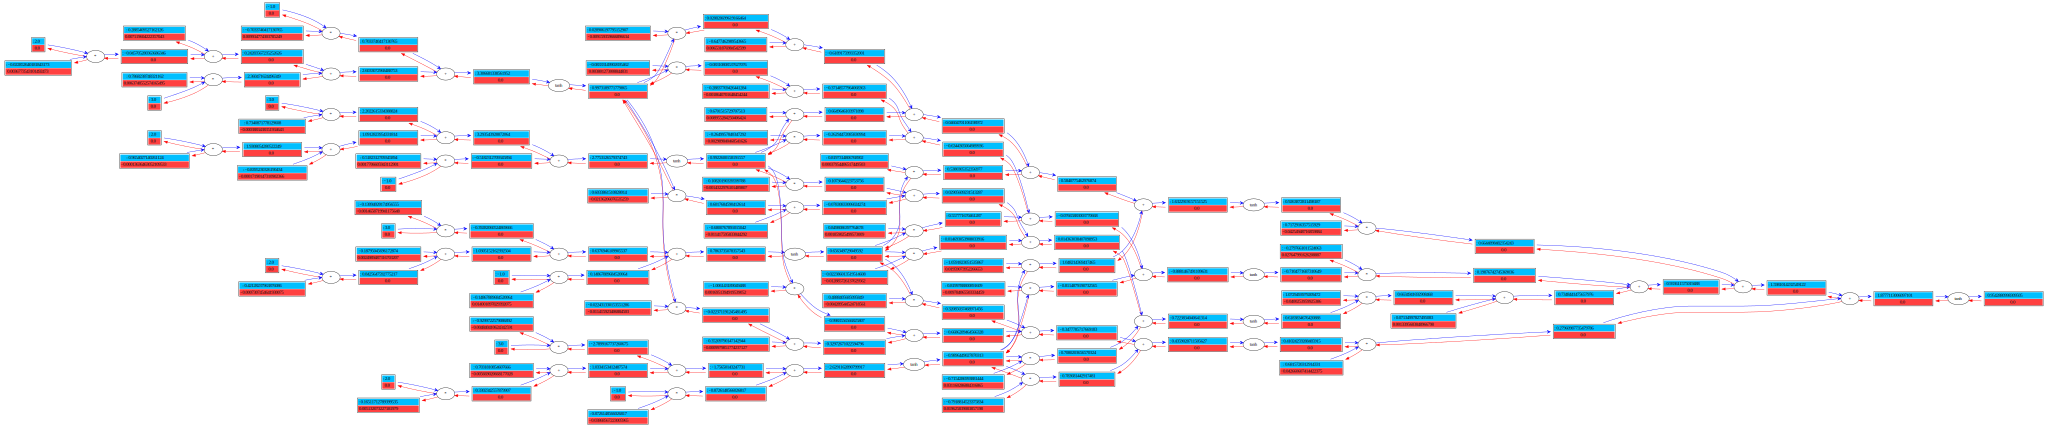

In [11]:
visualizer = ForwardGraphVisualizer()
rankdir = "LR"
visualizer.visualize( n(x),rankdir=rankdir)

In [8]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [9]:

for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)

0 6.737047343459174
1 4.058970175596367
2 3.193595230941306
3 2.528982438895442
4 2.6104162692892645
5 2.6129685529052225
6 3.3378594082215822
7 0.5015157676514399
8 0.18658476262511947
9 0.051948071116283745
10 0.04218530460294381
11 0.03602905502691995
12 0.031596708840077856
13 0.02818544125027291
14 0.025453115646359485
15 0.023204901354257776
16 0.021318150857536435
17 0.019710256299744527
18 0.018322847694179144
19 0.017113187779788618


In [10]:
ypred

[Tensor(0.9527190415565857),
 Tensor(-0.9545353937503818),
 Tensor(-0.9183301592348688),
 Tensor(0.9216373466731375)]

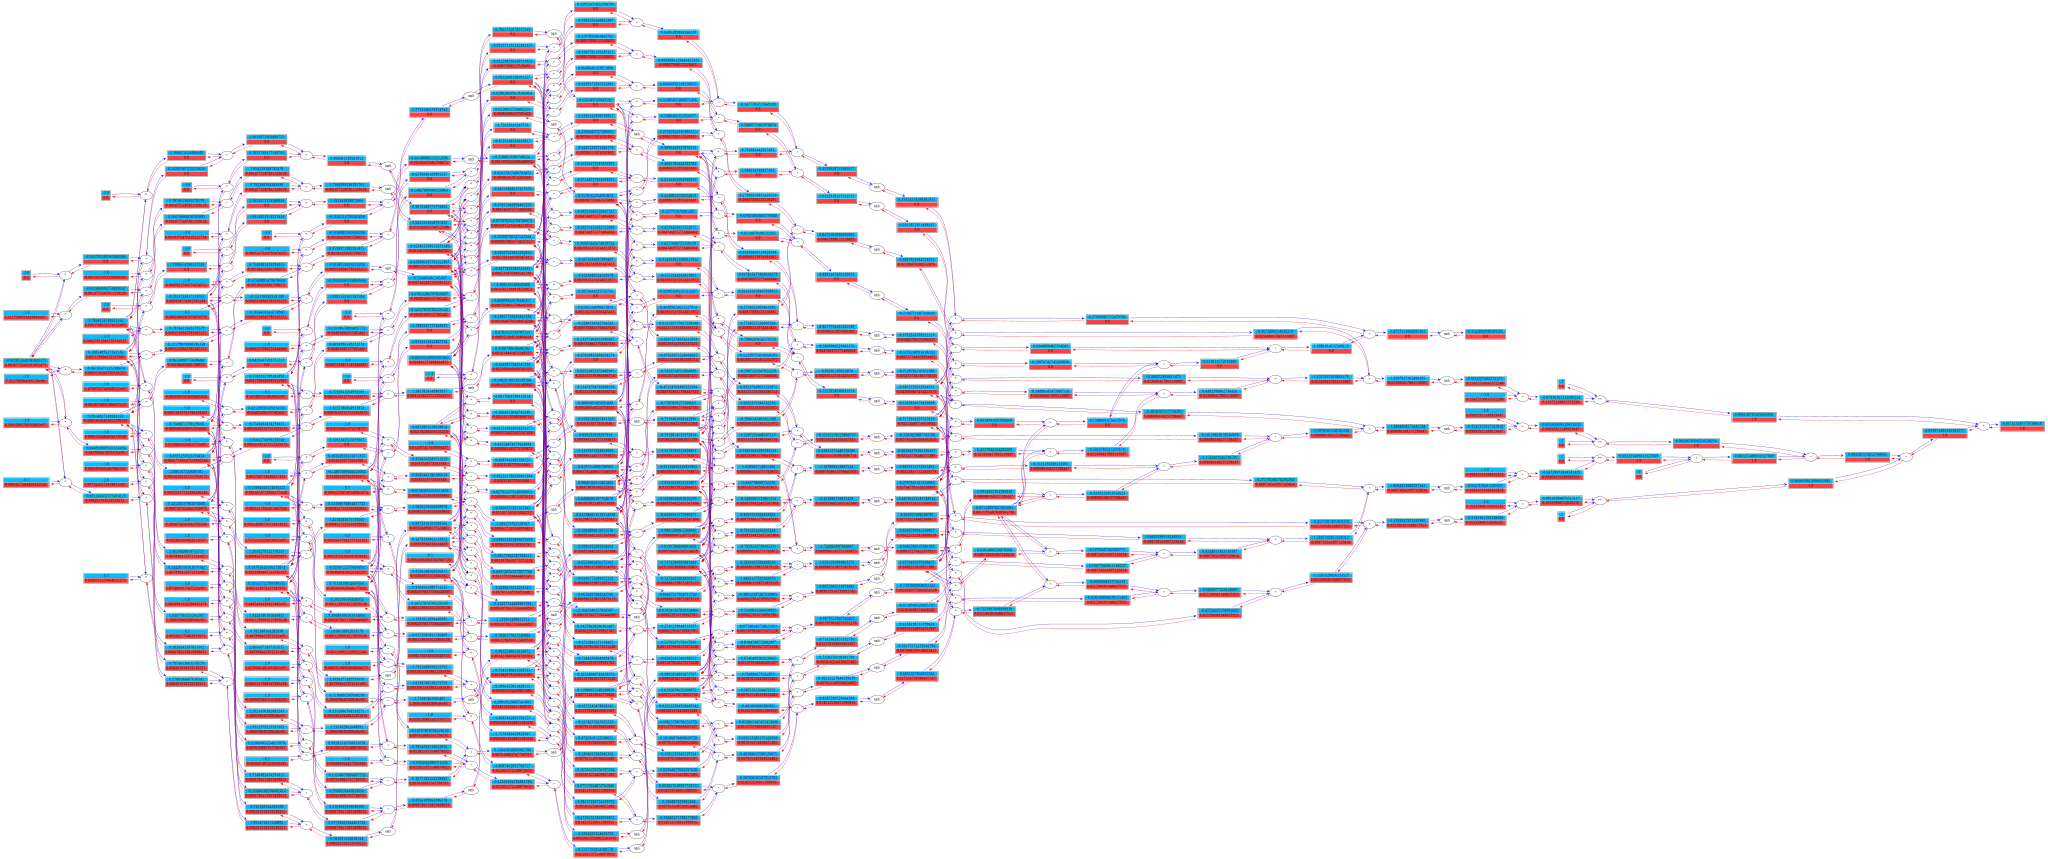

In [12]:
visualizer.visualize(loss)